## Title: AI/ML based price prediction using Recurrent Nueral Network (RNN) called Long Short Term Memort (LSTM): Predict by using raw data provided by some company 

### 1. Install and import rquired libraries 

In [17]:
# intsall required libarries
!pip install numpy
!pip install pandas
!pip install pandas_datareader
!pip install matplotlib
!pip install sklearn
!pip install -U scikit-learn scipy matplotlib

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
     --------------------------------------- 38.6/38.6 MB 13.5 kB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 28.2 kB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 26.4 kB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 22.9 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     --------------------------------------- 38.6/38.6 MB 28.3 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
     --------------------------------------- 38.6/38.6 MB 41.8 kB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [21]:
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
     --------------------------------------- 14.2/14.2 MB 14.6 kB/s eta 0:00:00
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  

In [22]:
#First import important libraries for this project
import math
import keras
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

### 2. Get the stock quote's data frame (df)

In [28]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-04-04', end='2022-04-04')

In [29]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-06,31.877501,31.082500,31.117500,31.837500,148776000.0,28.819185
2015-04-07,32.029999,31.495001,31.910000,31.502501,140049200.0,28.515947
2015-04-08,31.600000,31.242500,31.462500,31.400000,149316800.0,28.423166
2015-04-09,31.645000,31.165001,31.462500,31.639999,129936000.0,28.640411
2015-04-10,31.802500,31.315001,31.487499,31.775000,160752000.0,28.762611
...,...,...,...,...,...,...
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.449570
2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.262970
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.111984


#### Notice from the above result/output, rowXcolumn is 1764X6 

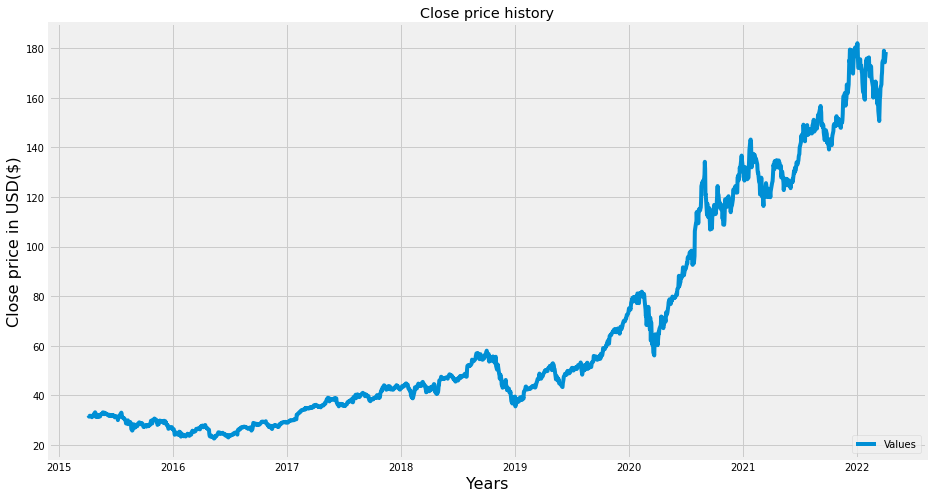

In [97]:
#visualize the close price history as:  
plt.figure(figsize=(14,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Years', fontsize=16)
plt.ylabel('Close price in USD($)',fontsize=16)
plt.legend(['Values'], loc='lower right')
plt.show()

In [37]:
#Create a new dataframe with only the 'Close column' called data
data = df.filter(['Close'])
#Convert the dataframe to a numpy array as:
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
print(dataset)
print(training_data_len)

[[ 31.83749962]
 [ 31.50250053]
 [ 31.39999962]
 ...
 [174.61000061]
 [174.30999756]
 [178.44000244]]
1412


In [44]:
#Scale the dataset between 0 to 1:
scaler = MinMaxScaler(feature_range=(0,1)) # range should be 0 to 1
scaled_data = scaler.fit_transform(dataset) # transform the dataset by the above scale
print(scaled_data)

[[0.0580367 ]
 [0.0559354 ]
 [0.05529246]
 ...
 [0.95358323]
 [0.95170144]
 [0.97760707]]


### 3. Create the training data set from the above data 

In [115]:
#First create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into test(x) and train(y) data as:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0580367 , 0.0559354 , 0.05529246, 0.05679787, 0.05764467,
       0.05725263, 0.05639016, 0.05714286, 0.0561863 , 0.05395955,
       0.05842873, 0.05734673, 0.06002823, 0.06167477, 0.06263134,
       0.06634781, 0.06307041, 0.0600596 , 0.05458681, 0.06054571,
       0.06015368, 0.0556061 , 0.05436727, 0.0547593 , 0.0584601 ,
       0.05642152, 0.05571587, 0.0559354 , 0.06054571, 0.06026346,
       0.06249021, 0.06230204, 0.06228635, 0.06437197, 0.06617531,
       0.06159636, 0.06539125, 0.06498354, 0.06263134, 0.06303904,
       0.06212955, 0.06238043, 0.06118866, 0.06007527, 0.05874237,
       0.05814647, 0.06043596, 0.05998118, 0.05775443, 0.0573624 ,
       0.05842873, 0.0579583 , 0.05886781, 0.0568606 , 0.05844442,
       0.0575349 , 0.05922849, 0.05827192, 0.05709582, 0.05361456])]
[0.05502588203675576]



In [116]:
#Convert the above x_train & y_train dataset to numpy arrays:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [117]:
#Reshape the data to be read by LSTM RNN i.e. 3D array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#Then th 3D array is:
print(x_train.shape)
 

(1352, 60, 1)


### 4. Build the LSTM Model 

In [118]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

### 5. Compile the model 

In [119]:
model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer

### 6. Train the model 

In [120]:
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1352/1352 [==============================] - 31s 21ms/step - loss: 8.4802e-04
Epoch 2/4
1352/1352 [==============================] - 27s 20ms/step - loss: 4.0939e-04
Epoch 3/4
1352/1352 [==============================] - 29s 21ms/step - loss: 3.2701e-04
Epoch 4/4
1352/1352 [==============================] - 29s 22ms/step - loss: 2.8310e-04


### 7. Create the testing dataset 

In [121]:
#Create a new array containing scaled values from index 1644 to 2004
test_data = scaled_data[training_data_len - 60:, :]
#Now create the datasets x_test & y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [122]:
#convert the above dataset to a numpy array:
x_test = np.array(x_test)

In [123]:
#Reshape the above converted dataset
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### 8. Get the models predicted price values for x_test dataset

In [124]:
predictions = model.predict(x_test) 
#Make inverse transform the above data to get x_test dataset:
Inv_predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 18ms/step


In [125]:
#Calculate the RMSE
RMSE = np.sqrt(np.mean(Inv_predictions - y_test)**2)
print(RMSE)

1.1894726103002375


### 9. Plot the result for visualization   

C:\Users\HP\AppData\Local\Temp\ipykernel_9708\3165522403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = Inv_predictions


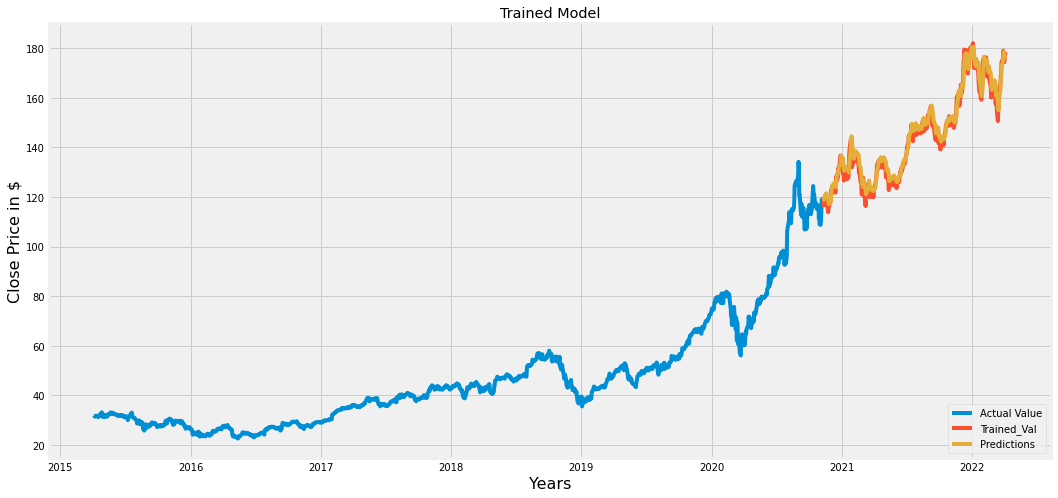

In [126]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = Inv_predictions
#Plotting
plt.figure(figsize=(16,8))
plt.title('Trained Model')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Close Price in $', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Actual Value', 'Trained_Val', 'Predictions'], loc='lower right')
plt.show()

### 10. Show the Trained valid values VS Predicted values/prices 

In [128]:
print(valid) # In USD $

                 Close  Predictions
Date                               
2020-11-10  115.970001   119.408218
2020-11-11  119.489998   118.868034
2020-11-12  119.209999   119.729073
2020-11-13  119.260002   120.405998
2020-11-16  120.300003   120.799591
...                ...          ...
2022-03-29  178.960007   175.933411
2022-03-30  177.770004   177.869308
2022-03-31  174.610001   178.494080
2022-04-01  174.309998   177.138184
2022-04-04  178.440002   175.808258

[352 rows x 2 columns]


### 11. For single day data 

In [129]:
#get the data/quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2015-04-04', end='2022-04-04')
#new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price value in numpy array form
last_60_days = new_df[-60:].values
#Scale it to 0-1
last_60_days_scaled = scaler.transform(last_60_days)
#creat empty list
X_test = []
#append the above values
X_test.append(last_60_days_scaled)
#convert the above data to numpy array
X_test = np.array(X_test)
#reshape to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
predicted_price = model.predict(X_test)
#Undo the sacling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)    # Gives the pr=ediction for 2022-04-05

1/1 [==============================] - 1s 866ms/step
[[176.86534]]


In [130]:
# The actual price for 2022-04-05 is:
apple_act_quote = web.DataReader('AAPL', data_source = 'yahoo', start='2022-04-05', end='2022-04-05')
apple_act_quote = apple_act_quote.filter(['Close'])
print(apple_act_quote)

                 Close
Date                  
2022-04-05  175.059998


In [131]:
#The difference between these prediction an dactual value is:
difference = predicted_price - apple_act_quote
print(difference)

               Close
Date                
2022-04-05  1.805344
